In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

In [2]:
df= pd.read_csv('rechit_features_with_target.csv')

In [4]:
true = np.load('true_energy_test.npy')
pred = np.load('predicted_energy_test.npy')

In [17]:
true.shape

(129656,)

In [7]:
true[0:10]

array([ 52.091194, 271.38815 , 276.50262 , 269.58325 , 331.03864 ,
       110.35932 , 203.7918  , 250.28105 ,  97.30372 ,  75.65112 ],
      dtype=float32)

In [8]:
pred[0:10]

array([ 50.06986, 271.31277, 256.2258 , 258.57462, 315.2694 , 111.85473,
       189.054  , 234.19594,  95.2398 ,  76.83008], dtype=float32)

(array([  25.,   20.,   16.,   24.,   16.,   24.,   24.,   29.,   34.,
          42.,   30.,   49.,   48.,   39.,   44.,   51.,   51.,   68.,
          60.,   65.,  110.,   81.,   96.,  106.,  129.,  138.,  171.,
         181.,  222.,  255.,  290.,  388.,  479.,  589.,  698.,  804.,
        1029., 1210., 1509., 1799., 2113., 2544., 2886., 3400., 3725.,
        4145., 4677., 5008., 5417., 5597., 5811., 5947., 5906., 5903.,
        5646., 5422., 5007., 4757., 4175., 3765., 3408., 3039., 2612.,
        2266., 1937., 1735., 1488., 1217.,  936.,  875.,  765.,  599.,
         524.,  448.,  401.,  307.,  279.,  227.,  227.,  192.,  179.,
         153.,  128.,  112.,  138.,  105.,   97.,   88.,   68.,   85.,
          66.,   55.,   53.,   65.,   40.,   54.,   51.,   41.,   38.,
          35.]),
 array([0.69999999, 0.70599997, 0.71200001, 0.71799999, 0.72399998,
        0.73000002, 0.736     , 0.74199998, 0.74800003, 0.75400001,
        0.75999999, 0.76599997, 0.77200001, 0.778     , 0.78399998

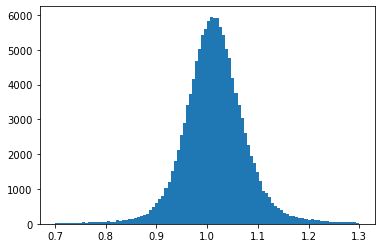

In [19]:
plt.hist(true/pred, bins = 100, range=(0.70, 1.3))


In [32]:
epsilon = 1e-8
response = true/pred

# Optionally: restrict to reasonable range (truncate manually)
response = response[(response > 0.7) & (response < 1.3)]  # or whatever makes sense

In [34]:
def truncated_gaussian(x, mu, sigma, a, b):
    # a and b are bounds in standard normal units
    a_scaled = (a - mu) / sigma
    b_scaled = (b - mu) / sigma
    return truncnorm.pdf(x, a_scaled, b_scaled, loc=mu, scale=sigma)


In [35]:
# Histogram
counts, bin_edges = np.histogram(response, bins=1000, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Fit
popt, _ = curve_fit(
    lambda x, mu, sigma: truncated_gaussian(x, mu, sigma, a=0.7, b=1.3),
    bin_centers, counts, p0=[1.0, 0.1]
)
mu_fit, sigma_fit = popt

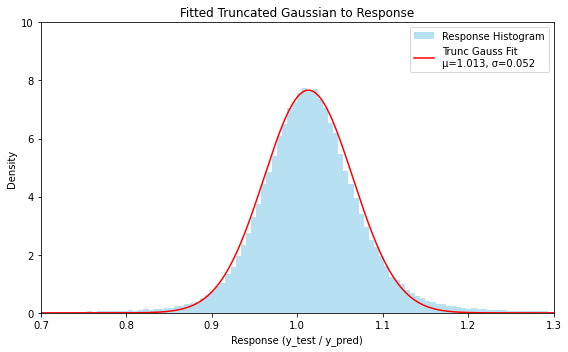

In [38]:
x_vals = np.linspace(0.7, 1.3, 1000)
pdf_vals = truncated_gaussian(x_vals, mu_fit, sigma_fit, a=0.5, b=1.5)

plt.figure(figsize=(8, 5))
plt.hist(response, bins=100, density=True, color='skyblue', alpha=0.6, label='Response Histogram')
plt.plot(x_vals, pdf_vals, 'r-', label=f'Trunc Gauss Fit\nμ={mu_fit:.3f}, σ={sigma_fit:.3f}')
plt.xlabel('Response (y_test / y_pred)')
plt.xlim(0.7, 1.3)
plt.ylim(0, 10)
plt.ylabel('Density')
plt.title('Fitted Truncated Gaussian to Response')
plt.legend()
plt.tight_layout()
plt.show()